In [1]:
print("hello world")

hello world


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv("data/station_day.csv")

In [6]:
df.shape

(108035, 16)

In [7]:
df.isna().sum()

StationId         0
Date              0
PM2.5         21625
PM10          42706
NO            17106
NO2           16547
NOx           15500
NH3           48105
CO            12998
SO2           25204
O3            25568
Benzene       31455
Toluene       38702
Xylene        85137
AQI           21010
AQI_Bucket    21010
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108035 entries, 0 to 108034
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   StationId   108035 non-null  object 
 1   Date        108035 non-null  object 
 2   PM2.5       86410 non-null   float64
 3   PM10        65329 non-null   float64
 4   NO          90929 non-null   float64
 5   NO2         91488 non-null   float64
 6   NOx         92535 non-null   float64
 7   NH3         59930 non-null   float64
 8   CO          95037 non-null   float64
 9   SO2         82831 non-null   float64
 10  O3          82467 non-null   float64
 11  Benzene     76580 non-null   float64
 12  Toluene     69333 non-null   float64
 13  Xylene      22898 non-null   float64
 14  AQI         87025 non-null   float64
 15  AQI_Bucket  87025 non-null   object 
dtypes: float64(13), object(3)
memory usage: 13.2+ MB


In [10]:
df.nunique()

StationId       110
Date           2009
PM2.5         22395
PM10          29575
NO            11963
NO2           12050
NOx           15608
NH3            9119
CO             2352
SO2            5801
O3            11166
Benzene        3017
Toluene        8713
Xylene         1892
AQI             930
AQI_Bucket        6
dtype: int64

In [11]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,86410.000000,65329.000000,90929.000000,91488.000000,92535.000000,59930.000000,95037.000000,82831.000000,82467.000000,76580.000000,69333.000000,22898.000000,87025.000000
mean,80.272571,157.968427,23.123424,35.240760,41.195055,28.732875,1.605749,12.257634,38.134836,3.358029,15.345394,2.423446,179.749290
std,76.526403,123.418672,34.491019,29.510827,45.145976,24.897797,4.369578,12.984723,39.128004,11.156234,29.348587,6.472409,131.324339
min,0.020000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,8.000000
25%,31.880000,70.150000,4.840000,15.090000,13.970000,11.900000,0.530000,5.040000,18.895000,0.160000,0.690000,0.000000,86.000000
50%,55.950000,122.090000,10.290000,27.210000,26.660000,23.590000,0.910000,8.950000,30.840000,1.210000,4.330000,0.400000,132.000000
75%,99.920000,208.670000,24.980000,46.930000,50.500000,38.137500,1.450000,14.920000,47.140000,3.610000,17.510000,2.110000,254.000000
max,1000.000000,1000.000000,470.000000,448.050000,467.630000,418.900000,175.810000,195.650000,963.000000,455.030000,454.850000,170.370000,2049.000000


In [12]:
df.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


In [13]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 13 numerical features : ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

We have 3 categorical features : ['StationId', 'Date', 'AQI_Bucket']


In [14]:
df.head(2)

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate


UNIVARITE ANALYSIS

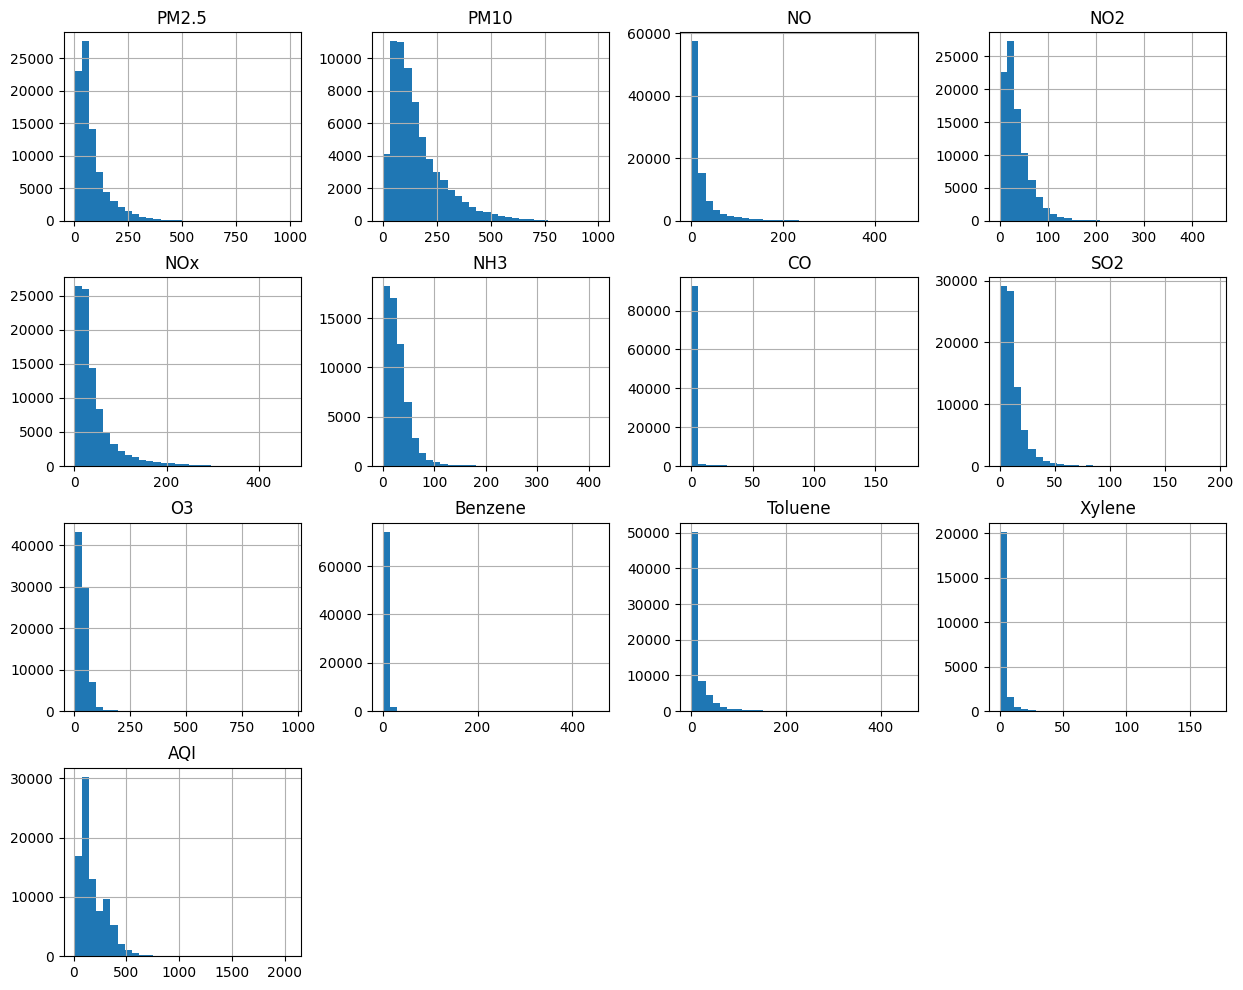

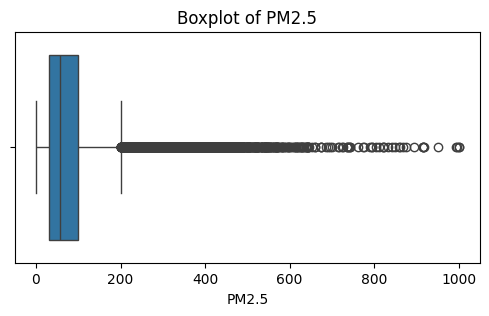

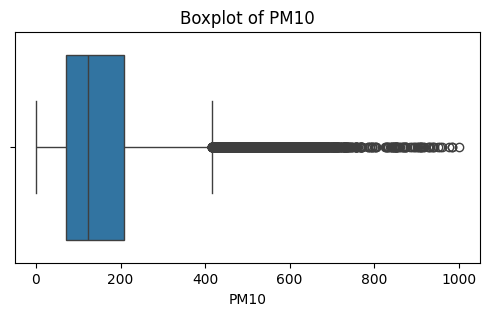

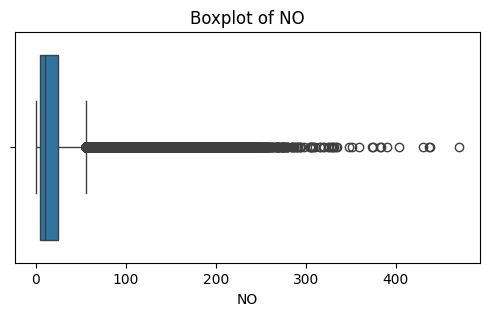

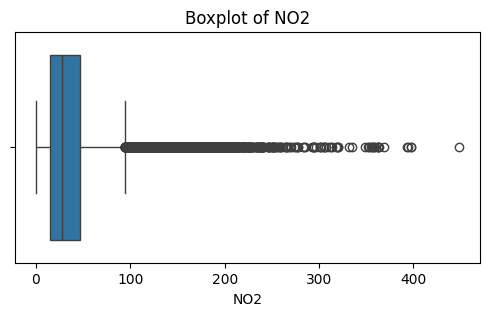

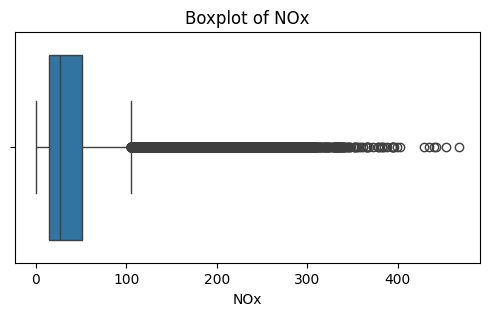

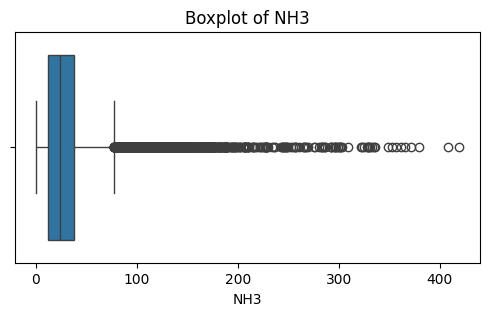

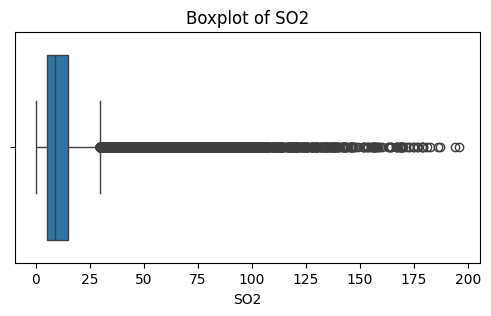

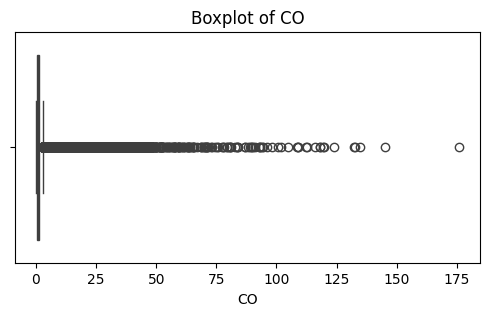

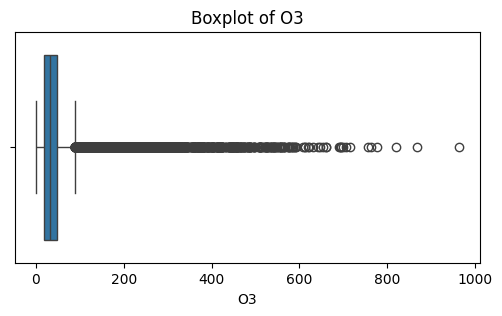

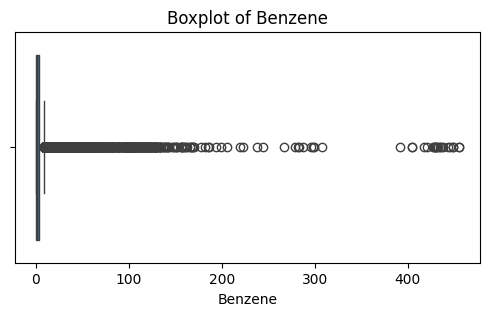

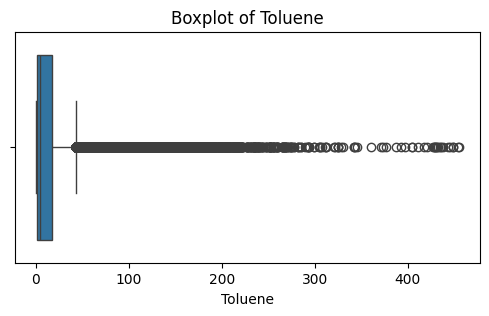

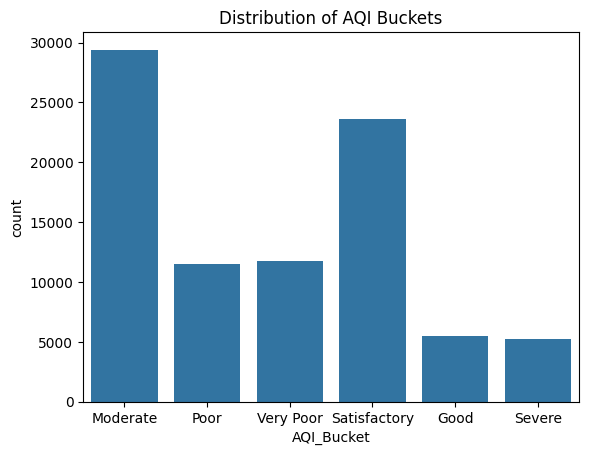

In [15]:
# Histograms
df.hist(bins=30, figsize=(15, 12))
plt.show()

# Boxplots for pollutants
pollutants = ['PM2.5','PM10','NO','NO2','NOx','NH3','SO2','CO','O3','Benzene','Toluene']
for col in pollutants:
    if col in df.columns:
        plt.figure(figsize=(6,3))
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot of {col}")
        plt.show()

# AQI Bucket distribution
if 'AQI_Bucket' in df.columns:
    sns.countplot(x='AQI_Bucket', data=df)
    plt.title("Distribution of AQI Buckets")
    plt.show()


BIVARITE ANALYSIS

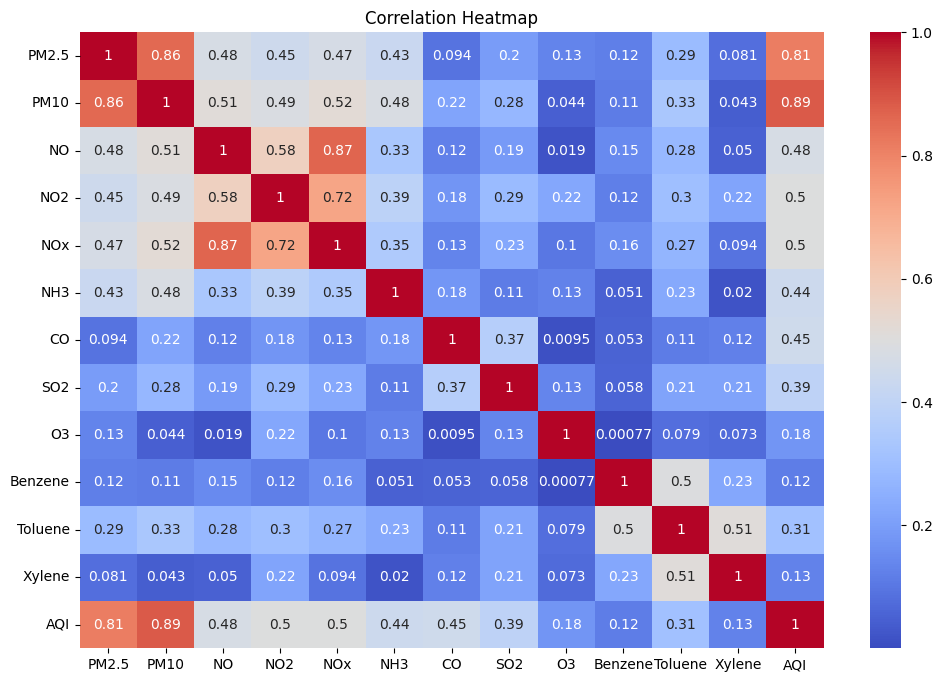

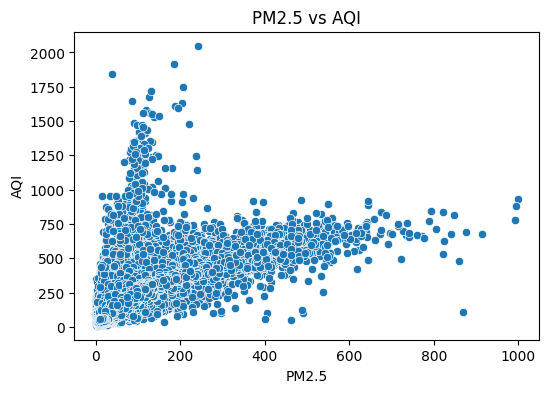

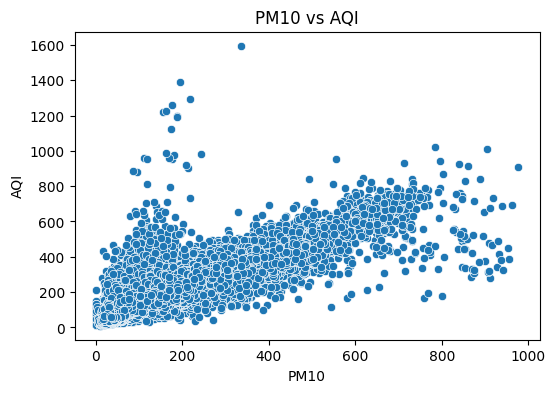

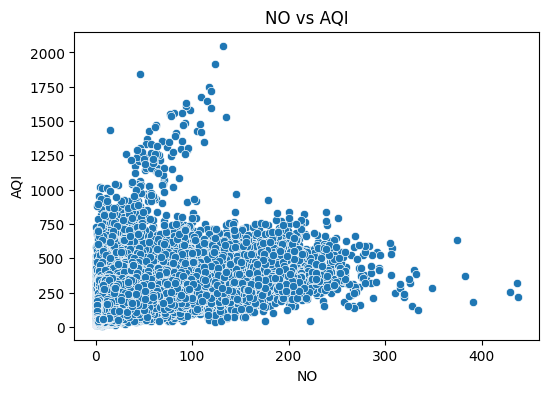

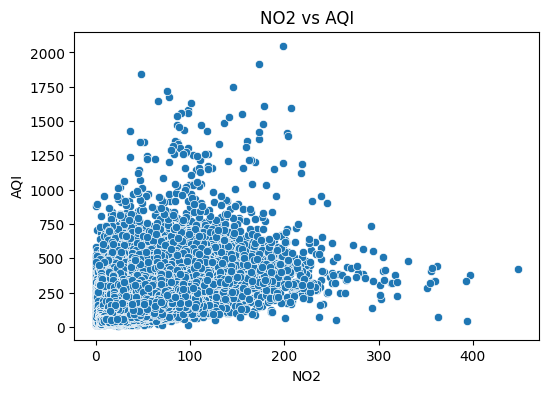

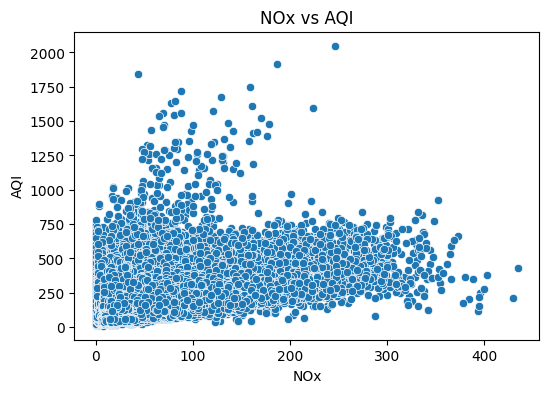

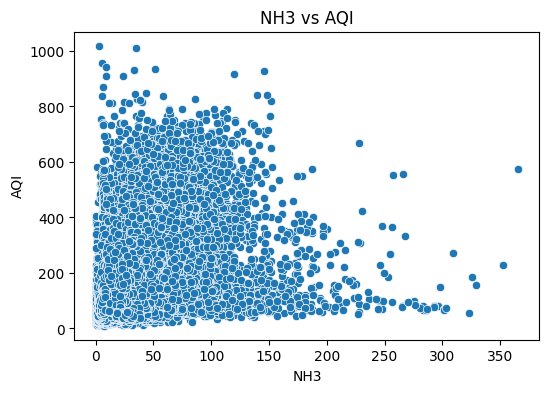

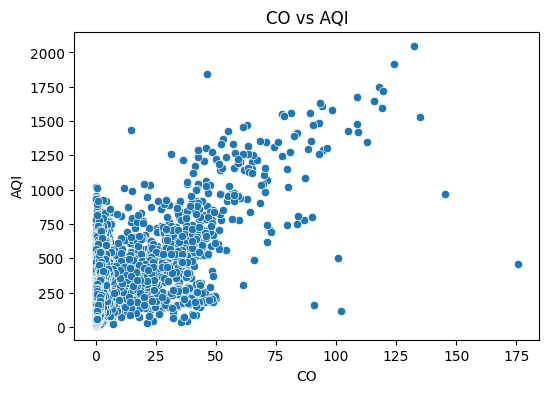

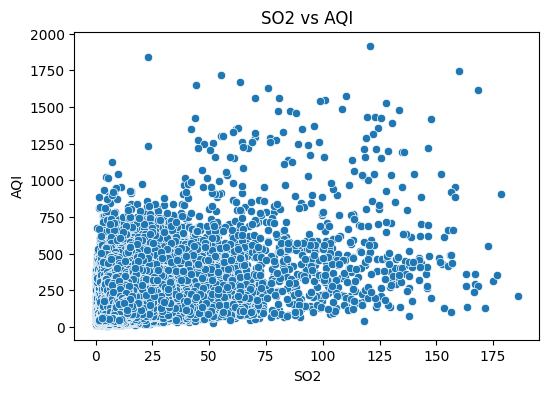

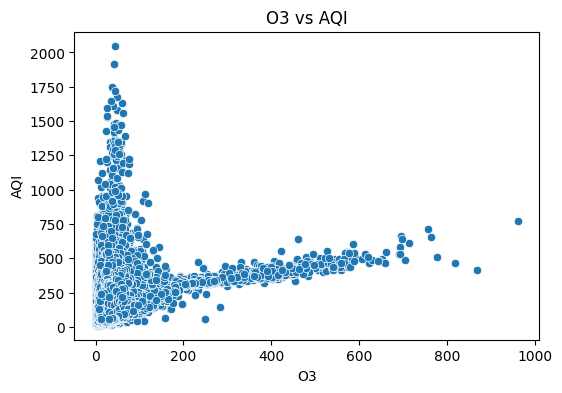

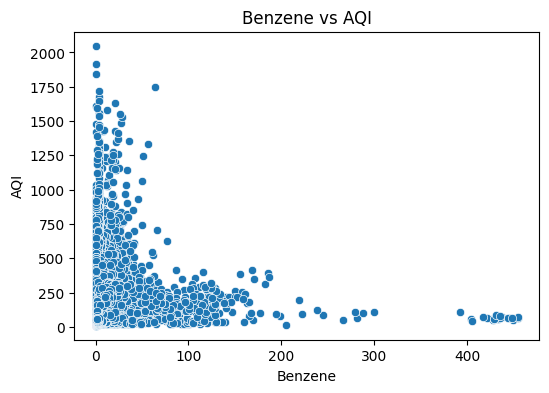

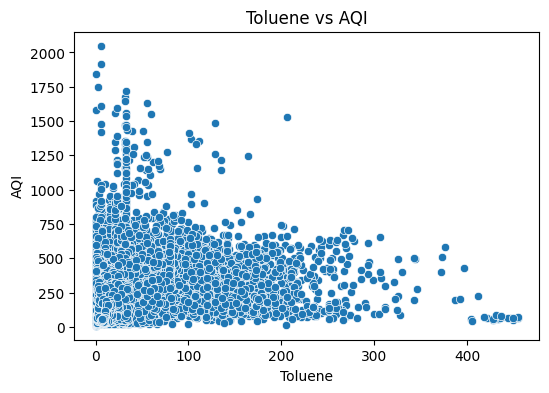

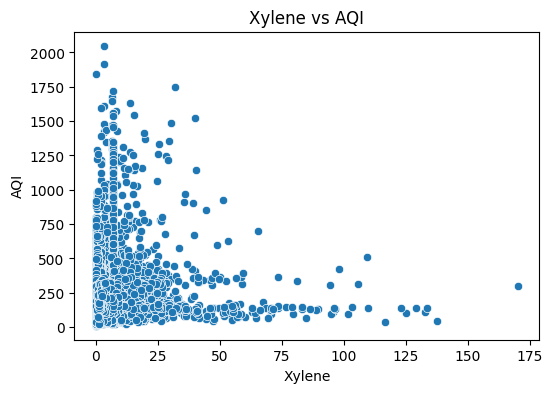

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns only (excluding Date)
numeric_df = df.select_dtypes(include=['int64','float64'])

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")  # annot=True shows values
plt.title("Correlation Heatmap")
plt.show()

# Pollutants vs AQI scatterplots
pollutants = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']

if 'AQI' in df.columns:
    for col in pollutants:
        if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
            plt.figure(figsize=(6,4))
            sns.scatterplot(x=df[col], y=df['AQI'])
            plt.xlabel(col)
            plt.ylabel('AQI')
            plt.title(f"{col} vs AQI")
            plt.show()


In [19]:
# Ensure 'Date' is datetime
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # convert strings to datetime
    df = df.dropna(subset=['Date'])  # remove rows where date conversion failed

# PM ratio
if 'PM2.5' in df.columns and 'PM10' in df.columns:
    df['PM_ratio'] = df['PM2.5'] / (df['PM10'] + 1e-6)  # avoid division by zero

# Total pollutants
pollutants_for_total = [col for col in pollutants if col in df.columns]
if pollutants_for_total:
    df['Total_pollutants'] = df[pollutants_for_total].sum(axis=1)

# Gaseous pollutants
gaseous = ['NO','NO2','NOx','SO2','CO','O3']
gaseous = [col for col in gaseous if col in df.columns]
if gaseous:
    df['Gaseous_pollutants'] = df[gaseous].sum(axis=1)

# Date-based features
if 'Date' in df.columns:
    df['Month'] = df['Date'].dt.month
    df['DayOfWeek'] = df['Date'].dt.dayofweek
    df['IsWeekend'] = df['DayOfWeek'].isin([5,6]).astype(int)


In [20]:
# Save the modified dataframe
df.to_csv("data/station_day_processed.csv", index=False)
